In [1]:
import anndata as ad
import pandas as pd
import numpy as np
from scipy import sparse
import episcanpy as epi 
import scanpy as sc


In [2]:
rna = ad.read("/dss/dsshome1/lxc02/di82cox/data/skin_data/GSM4156597_skin.late.anagen_raw_cell_annot.rna.h5ad")
rna

AnnData object with n_obs × n_vars = 42948 × 23296
    obs: 'atac_barcode', 'paper_cell_type'

In [3]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')

In [4]:
count = 0
for c in rna.var['mt']:
    if c == True:
        count += 1
        
print(count)

0


In [5]:
count = 0
for code in rna.obs['atac_barcode']:
    if code == 'NA':
        count += 1
        
print(count)

count = 0
for code in rna.obs['paper_cell_type']:
    if code == 'NA':
        count += 1
        
print(count)

8174
8174


In [6]:
rna.obs

,atac_barcode,paper_cell_type
index,,
R1.01.R2.01.R3.06.P1.55,R1.01.R2.01.R3.06.P1.07,Dermal Fibroblast
R1.01.R2.01.R3.36.P1.53,R1.01.R2.01.R3.36.P1.05,Dermal Papilla
R1.01.R2.01.R3.42.P1.55,NA,NA
R1.01.R2.01.R3.43.P1.56,R1.01.R2.01.R3.43.P1.08,TAC-1
R1.01.R2.01.R3.64.P1.53,NA,NA
...,...,...
R1.96.R2.96.R3.01.P1.55,NA,NA
R1.96.R2.96.R3.05.P1.55,NA,NA
R1.96.R2.96.R3.12.P1.55,NA,NA


In [7]:
#filter out the 'NA' cells that cant be matched to a atac barcode or cell type
rna = rna[rna.obs['atac_barcode'] != 'NA']

rna = rna[rna.obs['atac_barcode'] != 'NA']
rna

View of AnnData object with n_obs × n_vars = 34774 × 23296
    obs: 'atac_barcode', 'paper_cell_type'
    var: 'mt'

In [8]:
count = 0
for code in rna.obs['atac_barcode']:
    if code == 'NA':
        count += 1
        
print(count)

count = 0
for code in rna.obs['paper_cell_type']:
    if code == 'NA':
        count += 1
        
print(count)

0
0


In [9]:
rna.obs

,atac_barcode,paper_cell_type
index,,
R1.01.R2.01.R3.06.P1.55,R1.01.R2.01.R3.06.P1.07,Dermal Fibroblast
R1.01.R2.01.R3.36.P1.53,R1.01.R2.01.R3.36.P1.05,Dermal Papilla
R1.01.R2.01.R3.43.P1.56,R1.01.R2.01.R3.43.P1.08,TAC-1
R1.01.R2.02.R3.21.P1.56,R1.01.R2.02.R3.21.P1.08,IRS
R1.01.R2.02.R3.38.P1.56,R1.01.R2.02.R3.38.P1.08,Basal
...,...,...
R1.96.R2.92.R3.28.P1.56,R1.96.R2.92.R3.28.P1.08,TAC-2
R1.96.R2.92.R3.83.P1.54,R1.96.R2.92.R3.83.P1.06,Basal
R1.96.R2.92.R3.85.P1.55,R1.96.R2.92.R3.85.P1.07,Basal


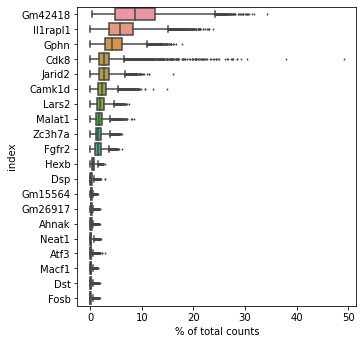

In [10]:
sc.pl.highest_expr_genes(rna, n_top = 20)

In [11]:
sc.pp.filter_cells(rna, min_genes = 200)

In [12]:
sc.pp.filter_genes(rna, min_cells = 2)

In [13]:
rna

AnnData object with n_obs × n_vars = 34774 × 21834
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes'
    var: 'mt', 'n_cells'

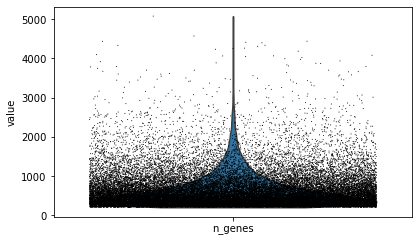

In [14]:
sc.pl.violin(rna, 'n_genes', jitter = 0.4)

In [15]:
sc.pp.calculate_qc_metrics(rna, percent_top = None, log1p = False, inplace = True)

In [16]:
rna

AnnData object with n_obs × n_vars = 34774 × 21834
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

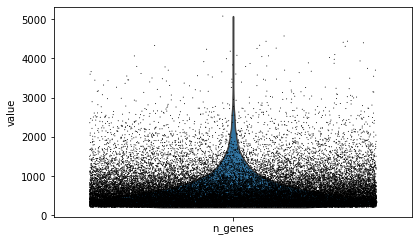

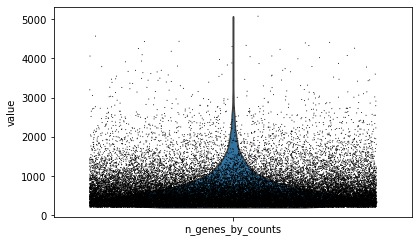

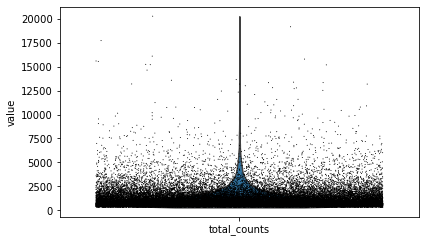

In [17]:
sc.pl.violin(rna, 'n_genes', jitter = 0.4)
sc.pl.violin(rna, 'n_genes_by_counts', jitter = 0.4) # number of genes with positive counts in a cell
sc.pl.violin(rna, 'total_counts', jitter = 0.4) # number of total counts  for a cell

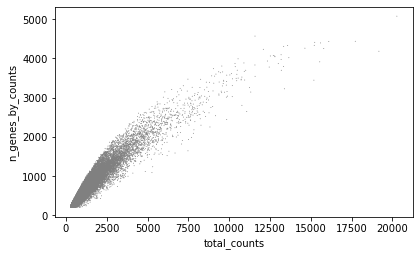

In [18]:
sc.pl.scatter(rna, x = 'total_counts', y = 'n_genes_by_counts')

In [19]:
rna

AnnData object with n_obs × n_vars = 34774 × 21834
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [20]:
# filter the anndata object
rna = rna[rna.obs.n_genes_by_counts < 4000, :]
rna

View of AnnData object with n_obs × n_vars = 34755 × 21834
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

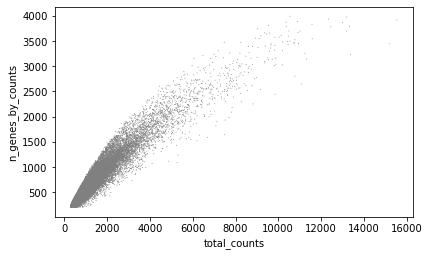

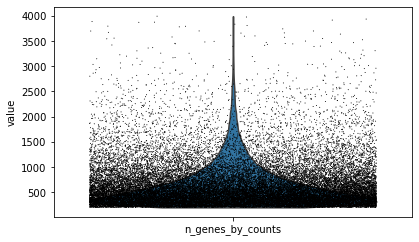

In [21]:
sc.pl.scatter(rna, x = 'total_counts', y = 'n_genes_by_counts')

sc.pl.violin(rna, 'n_genes_by_counts', jitter = 0.4)

In [22]:
# save obs and var
rna.write_csvs(dirname="/dss/dsshome1/lxc02/di82cox/code/sheetal/skin_preprocessed_rna")

writing .csv files to /dss/dsshome1/lxc02/di82cox/code/sheetal/skin_preprocessed_rna


In [23]:
# save count matrix
sparse.save_npz('/dss/dsshome1/lxc02/di82cox/code/sheetal/skin_preprocessed_rna/sparse_matrix.npz', rna.X)